<div style="border:solid Chocolate 2px; padding: 40px">

# Продажи компьютерных игр. Исследовательский анализ данных

</div>

В нашем распоряжении данные по продажам компьютерных игр за период с 1980 года и до 2016 года. 

<b>Цель исследования:</b>

1. Проанализировать рынок компьютерных игр;
1. Выявить закономерности, определяющие успешность игры;
2. Сделать прогноз по перспективным играм для продажи в 2017 году.

<b>Ход исследования:</b>

Прежде чем приступить к анализу, понадобится предварительная обработка данных.
После предобработки проведем исследовательский анализ данных для выполнения поставленных целей, составим портрет потребителя по регионам, а также проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Таким образом, исследование пройдет в пять этапов:

1. Обзор данных.
2. Подготовка данных.
3. Исследовательский анализ данных.
4. Составление портрета потребителя по ключевым регионам.
5. Проверка гипотез.

## Обзор данных

Импортируем все необходимые библиотеки и изучим датасет.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проблема с доступом к датасету")

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первичный просмотр данных выявил: 
датасет довольно высокого качества, собраны все данные по продажам игр в различных регионах мира, есть полная информация по платформам и жанрам игр. На основании такого датасета можно делать анализ.

Замечания:
- Названия колонок необходимо отредактировать (убрать заглавные буквы).
- Есть пропуски, особенно большое количество пропусков в данных с оценками пользователей и критиков, а также в рейтинге игр.
- В некоторых столбцах  необходимо поменять тип данных. 

Приступим к подготовке данных.

## Предобработка данных

Для начала поправим названия столбцов - приведём все к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками

Посмотрим, много ли пропусков в данных.

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Данных с пропущенными названиями игр - всего две строки, можем удалить без вреда для датасета. Вероятнее всего, причина пропуска - в технической ошибке при сборе данных.

In [8]:
data = data.dropna(subset=['name'])
#проверим, удалились ли строки с пропусками
data[data['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Данные с годом выпуска игры - важная информация для дальнейшего анализа, поскольку мы будем смотреть на продажи игр в том числе исходя из временных периодов. Поэтому пропуски в колонке year_of_release важно исключить.
Посмотрим на эти данные - может быть пропущен какой-то конкретный год?

In [9]:
data[data.year_of_release.isna() == True].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Простая проверка в открытых источниках нескольких рандомных игр показала, что пропущенные года выпуска - разные, закономерностей не видно. Скорее всего, данные пропущены по технической ошибке.
Можно было бы заполнить пропущенные года, используя открытые источники, но в ручном режиме делать это долго. И поскольку пропуски составляют всего 2% от датасета, можем удалить эти данные без вреда для анализа.

In [10]:
data = data.dropna(subset=['year_of_release'])
#проверим, удалились ли строки с пропусками
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Посмотрим на пропуски в столбце genre.

In [11]:
data[data.genre.isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Этих пропусков уже нет, видимо мы их убрали вместе с пропусками в названии или в годе выпуска.

Больше 50% пропусков в столбце critic_score, и 40% пропусков в user_score. Это довольно много. Посмотрим на эти данные поближе и попробуем разобраться, с чем связаны эти пропуски. Может быть в какой-то конкретный период не собирались оценки критиков и пользователей?

In [12]:
data[data.critic_score.isna() == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Каких-либо зависимостей от года выпуска, от жанра и от других данных не видно. Вероятнее всего, этих данных просто не было в источниках, откуда они собирались. 
Ставить средние значения в critic_score и user_score было бы неверно, поскольку оценка каждой игры может значительно варьироваться, и она могла быть как сильно выше, так и сильно ниже средней, поэтому таким заполнением мы можем исказить информацию. 

По поводу столбца rating - скорее всего пропуски так же связаны с тем, что этих данных не было в источниках, откуда собиралась информация. Пометим в этих пропусках "No rating", чтобы не потерять большой объем данных при дальнейшем анализе.

In [13]:
data.rating = data.rating.fillna('No rating')
data.rating.isna().sum()

0

### Изменение типов данных

Преобразуем типы данных в столбце year_of_release.

In [14]:
data.year_of_release = data.year_of_release.astype('Int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Также преобразования в числовой формат требует столбец user_score, но сначала обратим внимание на аббревиатуру 'tbd' в этом столбце. Часто ли он встречается в данных?

In [16]:
len(data[data.user_score == 'tbd'])/len(data.user_score)*100

14.449039163220629

Целых 14% - это довольно много. Посмотрим поближе на эти данные.

In [17]:
data[data['user_score'].isin(['tbd'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Скорее всего аббревиатура 'tbd' подразумевала, что данные будут заполнены позже (анг. 'to be determined'). 
Но поскольку мы работаем с текущим датасетом и данные в нём уже не будут дополняться, заменим tbd на NaN, чтобы возможно было дальше производить анализ численных значений этого столбца.

In [18]:
data.user_score = pd.to_numeric(data.user_score, errors='coerce')

Проверим, нет ли подобной аббревиатуры в столбце critic_score.

In [19]:
data[data.critic_score == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
#проверим, что все данные теперь приведены к правильному типу
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Проверка дубликатов

Проверим данные на явные дубликаты.

In [21]:
data.duplicated().sum()

0

Теперь посмотрим на наличие неявных дубликатов в столбцах platform, genre и rating.

In [22]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Нашли дублирующуюся игру. Можем удалить ту строку, где значения по продажам нулевые - видимо, это более ранняя информация по игре.

In [23]:
data = data.drop(index=[16230])
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Выводы и рекомендации

В ходе предобработки данных выявлены следующие проблемы в данных:
- Большое количество пропусков в данных с оценками пользователей и критиков - на будущее стоит расширить пул источников, откуда собираются оценки.
- Большое количество пропусков в данных о рейтинге ESRB - лучше на месте пропусков ставить "No rating", чтобы при анализе учитывались и игры без рейтинга.
- 2% пропусков в годах - мы их удалили, поскольку пропусков небольшое количество и их удаление не помешает ходу исследования. Но на будущее можно было бы дозаполнить пропущенные года, найдя их в открытых источниках.
- Неверные типы данных в столбцах "год выпуска" и "оценка пользователей" - стоит проверить, почему идёт заполнение в неверном формате.


## Обогащение данных

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales.

In [24]:
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38


## Исследовательский анализ данных

### Распределение выпусков игр по годам

Посмотрим, сколько игр выпускалось в разные годы.

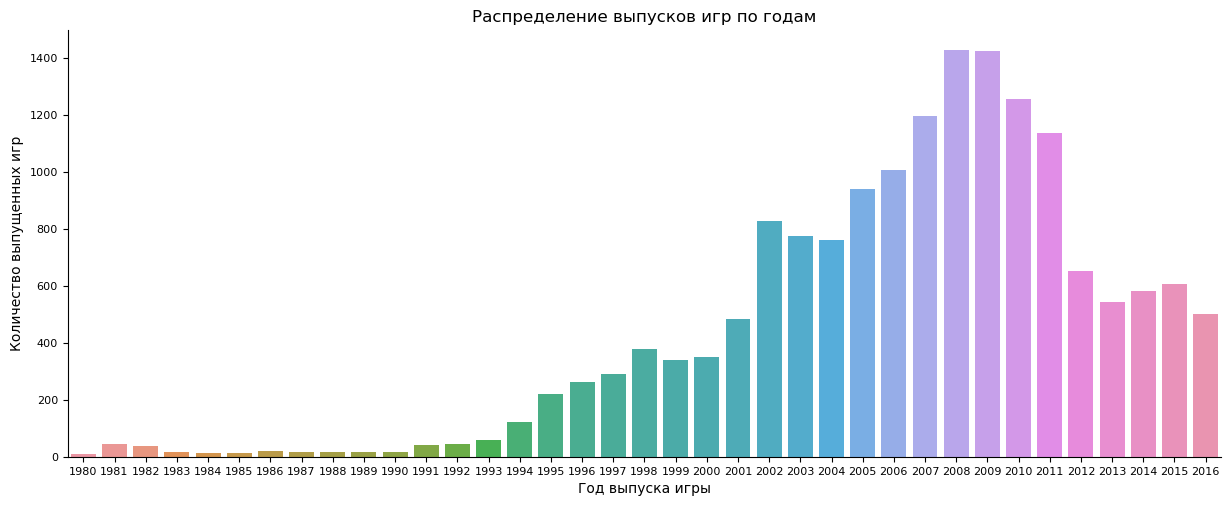

In [25]:
sns.catplot(x='year_of_release', kind='count', data=data, aspect=2.5)
plt.title('Распределение выпусков игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.tick_params(axis='both', which='major', labelsize= 8)
plt.show()

После 2001 года игры стали выпускаться гораздо активнее.
Пик по количеству выпущенных игр приходится на 2008-2009 годы, а вот с 2012 года можно наблюдать резкий спад числа выпускаемых игр. С 2014 года наблюдается постепенное увеличение количества выпускаемых игр.

Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

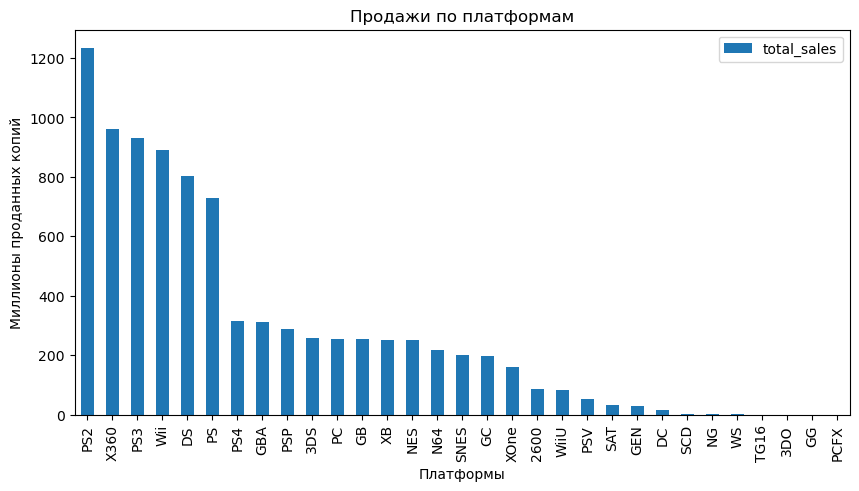

In [26]:
#сгруппируем данные по платформам и выясним, у каких из платформ были самые высокие продажи
platform_sales = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
#посмтроим график распределения продаж по годам
platform_sales.plot(kind='bar', figsize=(10,5))
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')
plt.show()

Мы видим, что топ-6 платформ идут с большим отрывом по продажам по сравнению с платформами, следующими за ними. 
Возьмем на рассмотрение топ-10 платформ, чтобы охватить и самые большие по продажам, и "среднечки". 
Построим графики распределения продаж по годам, чтобы выяснить, за какой характерный срок появляются новые и исчезают старые платформы.

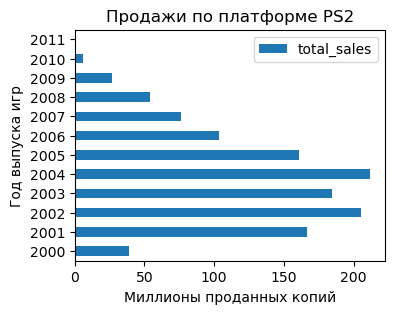

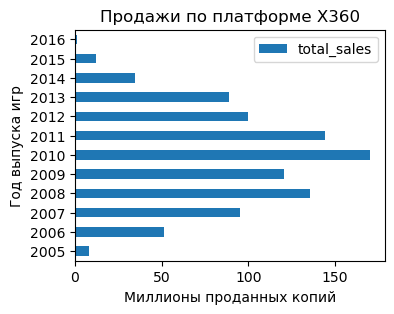

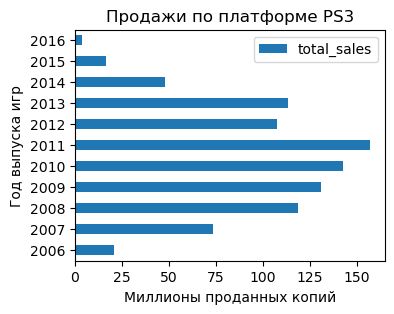

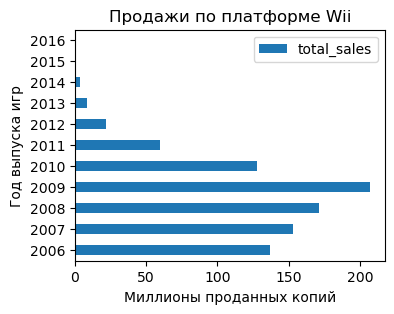

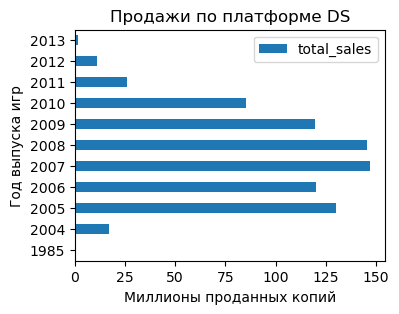

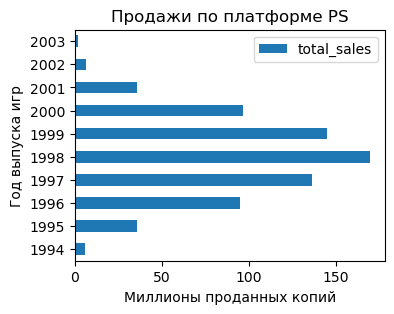

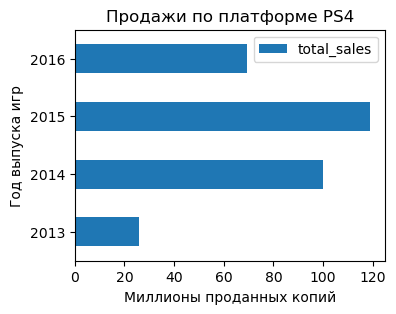

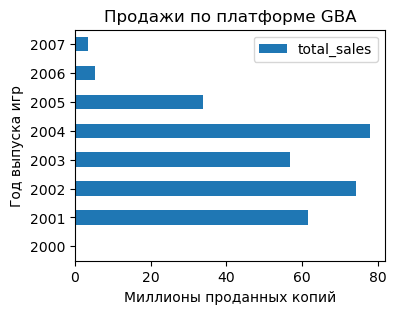

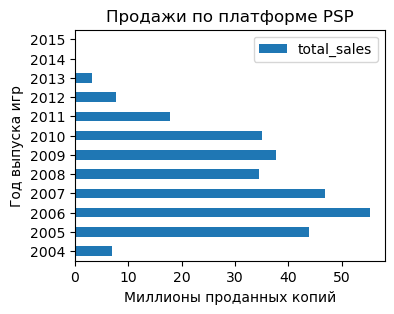

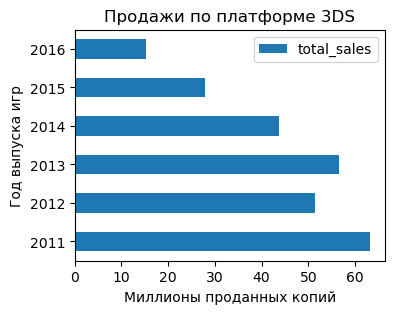

In [27]:
#группируем данные по типу платформы и годам выпуска, считая суммы продаж по каждому году, и строим графики

for platform in platform_sales.head(10).index.tolist():
    data[data['platform'] == platform].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='barh', figsize=(4,3))
    plt.title('Продажи по платформе '+platform)
    plt.xlabel('Миллионы проданных копий')
    plt.ylabel('Год выпуска игр')

По графикам видим, что для топовых платформ в среднем проходит 9-10 лет с момента появления и до прекращения продаж платформы, при этом пик продаж приходится примерно на 4-6й год с момента запуска платформы.
Данные по PS4 и 3DS - неполные, поскольку их продажи захватывают 2016 год, а по 2016 году мы имеем неполные данные.
PS4 вышел в 2013 году, придя на смену PS3, продажи которого к 2016 году соответственно упали.

Таким образом, что удалось выяснить:
- пик выпущенных игр пришелся на 2008-2009 годы, после чего последовало снижение количества выпускаемых игр, которое в последние года (2014-2016 гг) начало снова расти;
- характерный срок "жизни" платформы: примерно 9-10 лет;
- пик продаж игровой платформы приходится ориентировочно на 4-6й год с момента её запуска.

Исходя из этих вводных, для дальнейшего анализа считаем целесообразным выбрать <b>актуальный период с 2014 по 2016 год.</b>
Это позволит охватить те игры, у которых есть хороший потенциал по продажам в 2017 году, проследить динамику и исключить те, чья популярность уже на этапе спада.

In [28]:
relevant_data = data[data['year_of_release'] > 2013]
relevant_data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,No rating,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,No rating,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


### Платформы, перспективные для продаж

Изучим, какие игровые платформы за актуальный период лидируют по продажам и как распределяются их продажи по годам.

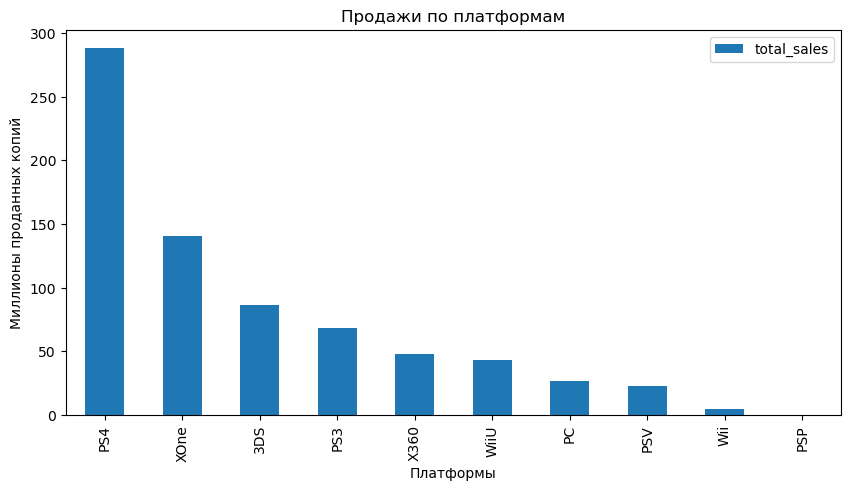

In [29]:
new_platform_sales = (
    relevant_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
new_platform_sales.plot(kind='bar', figsize=(10,5))
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')
plt.show()

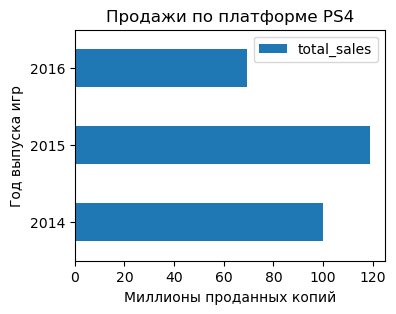

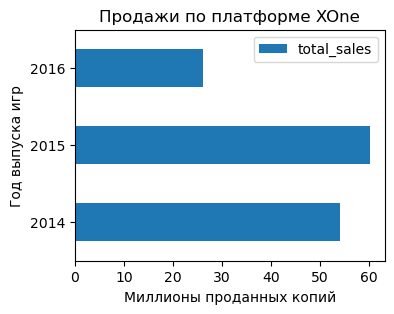

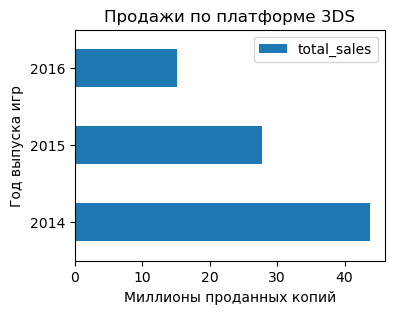

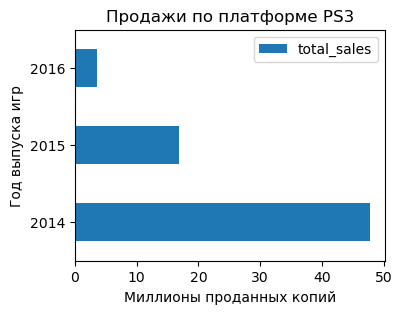

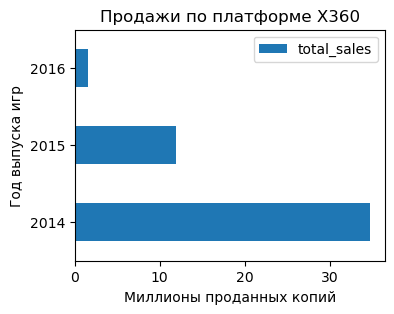

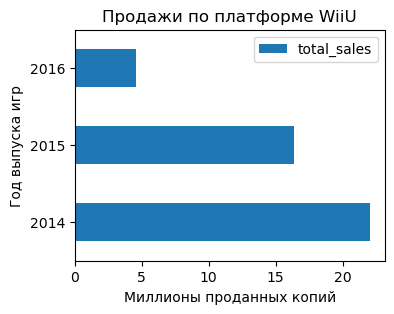

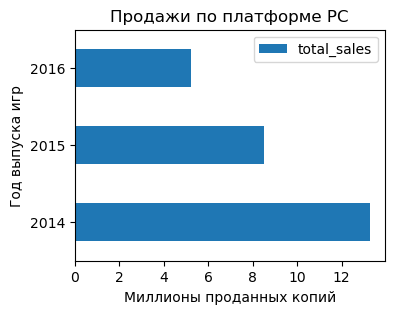

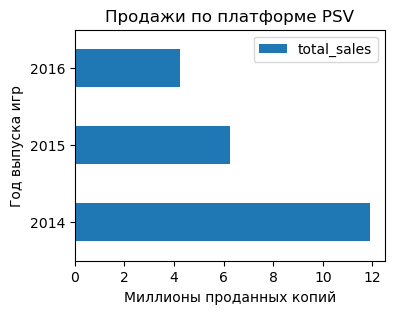

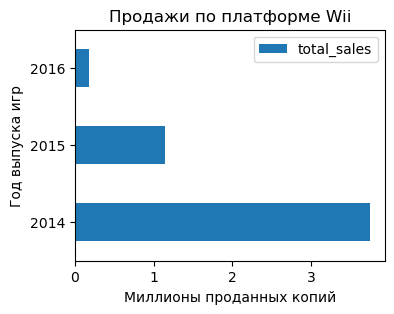

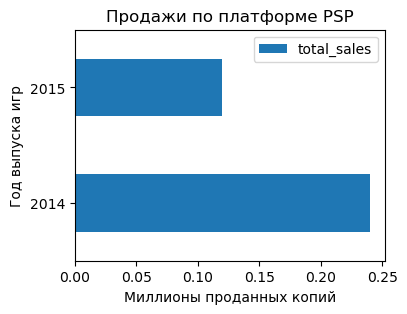

In [30]:
for platform in new_platform_sales.index.tolist():
    relevant_data[relevant_data['platform'] == platform].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='barh', figsize=(4,3))
    plt.title('Продажи по платформе '+platform)
    plt.xlabel('Миллионы проданных копий')
    plt.ylabel('Год выпуска игр')

Можем выделить следующие игровые платформы с отличной динамикой роста:
- PS4 (PlayStation 4)
- XOne (XBox One)

Следующие платформы также с хорошей перспективой: хотя в 2015 году у них прослеживался явный спад, в 2016 году продажи довольно высокие, вероятно что к концу 2016 года они будут выше, чем в 2015 году:
- 3DS
- PSV
- PC

Платформа WiiU также потенциально прибыльна, но важно учитывать, что её популярность уже идёт на спад, поэтому не стоит её рассматривать в долгосрочной перспективе.

Следующие платформы не имеют перспектив для продаж:
- PS3, X360, Wii (в связи с выходами более свежих версий платформ)
- PSP (новые игры уже не выходят).

### Зависимость продаж игр от платформы

Посмотрим на распределение по глобальным продажам игр в разбивке по платформам.

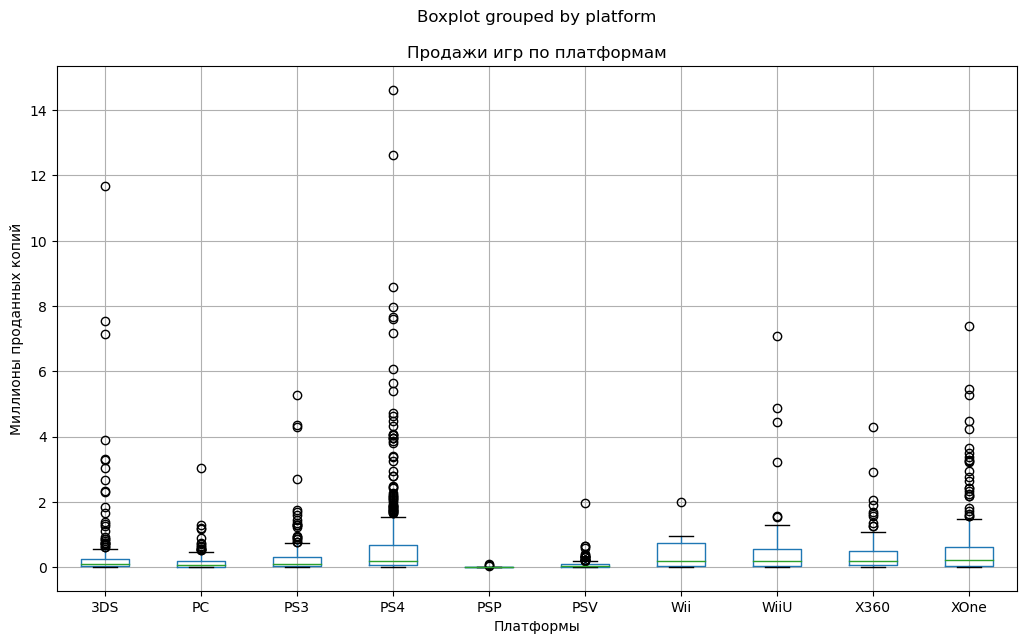

In [31]:
relevant_data.boxplot(column='total_sales', by='platform', figsize=(12,7))
plt.title('Продажи игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')
plt.show()

Заметны очень яркие выбросы по продажам игр у PlayStation 4 (самая прибыльная достигла по продажам более 14 млн!), также менее яркие, но всё еще заметные у XBox One, WiiU и 3DS. Это означает, что на данных платформах выходили игры, которые "выстреливали" и набирали огромную популярность.
Построим график, исключив выбросы, чтобы посмотреть внимательнее на медианные значения по продажам на разных платформах.

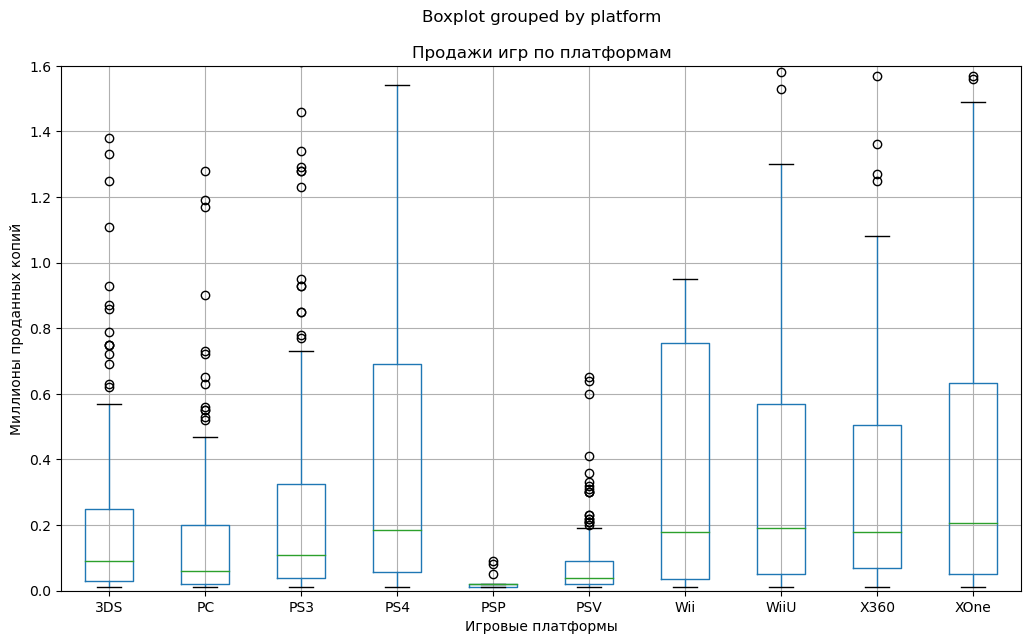

In [32]:
relevant_data.boxplot(column='total_sales', by='platform', figsize=(12,7))
plt.ylim(0, 1.6)
plt.title('Продажи игр по платформам')
plt.xlabel('Игровые платформы')
plt.ylabel('Миллионы проданных копий')
plt.show()

Выводы:
- В среднем у консольных игр больше продаж, чем у компьютерных (платформа PC).
- Средние продажи консольных игр на разных платформах приблизительно равны и составляют около 0,1 - 0,2 млн проданных копий.
- На всех популярных платформах встречаются бестселлеры, которые собирали продажи от 1 млн и более.

### Зависимость продаж от отзывов пользователей и критиков

Изучим, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков. 
Построим диаграммы рассеяния и посчитаем корреляцию между отзывами критиков и продажами.

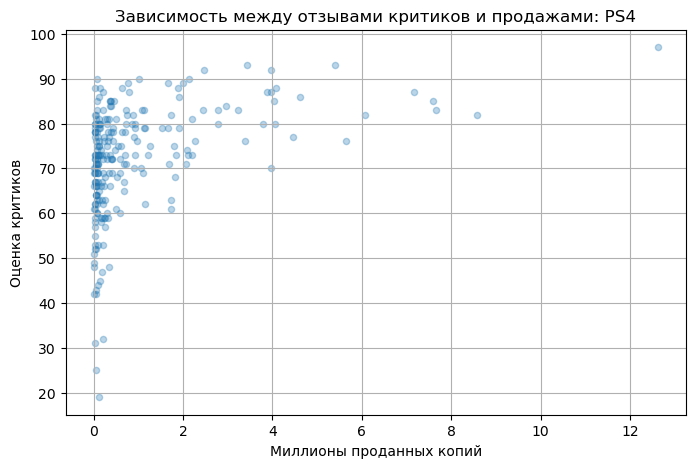

Коэффициент корреляции продаж и отзывов критиков для платформы PS4
0.40266141068104083


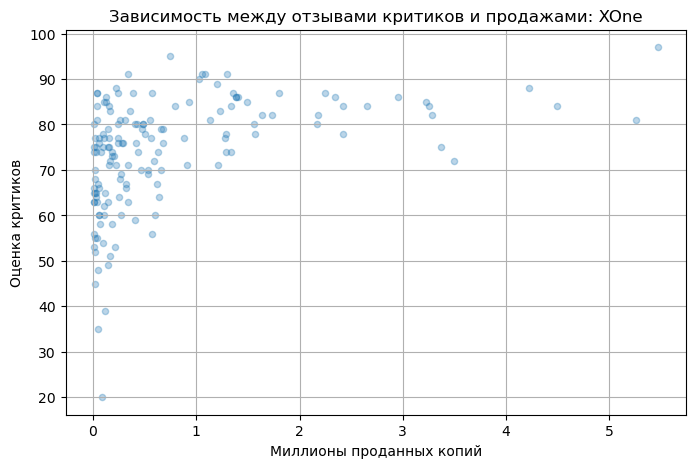

Коэффициент корреляции продаж и отзывов критиков для платформы XOne
0.42867694370333226


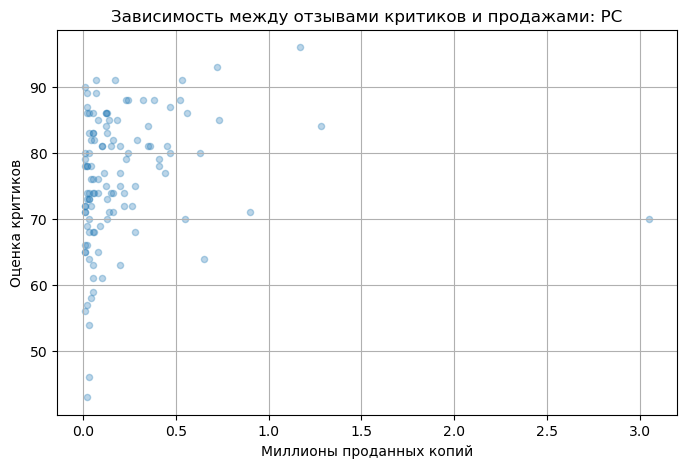

Коэффициент корреляции продаж и отзывов критиков для платформы PC
0.17463413769350036


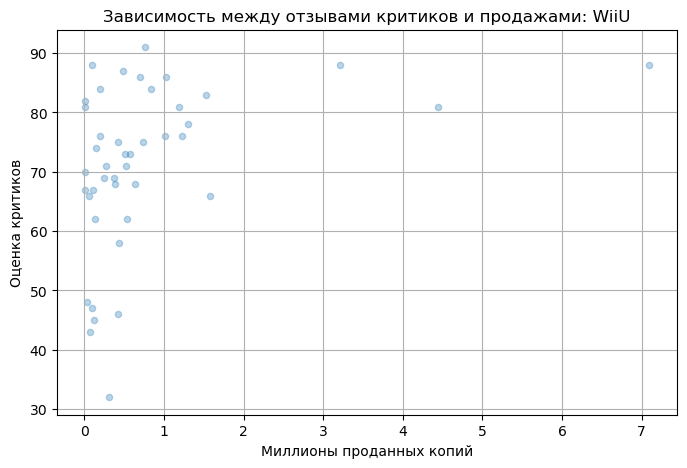

Коэффициент корреляции продаж и отзывов критиков для платформы WiiU
0.370201412480884


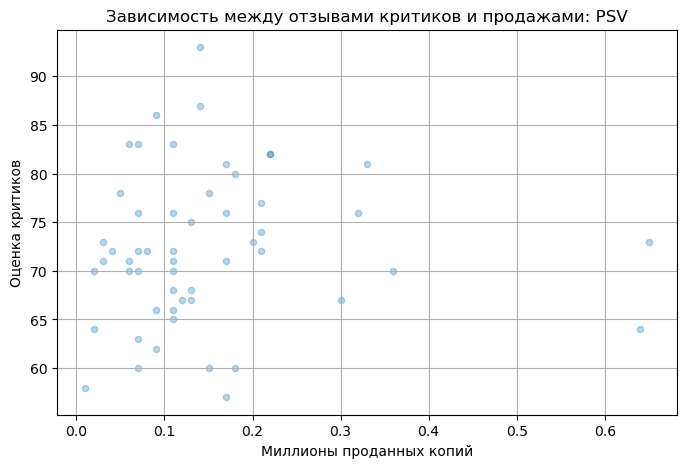

Коэффициент корреляции продаж и отзывов критиков для платформы PSV
0.04266490657009526


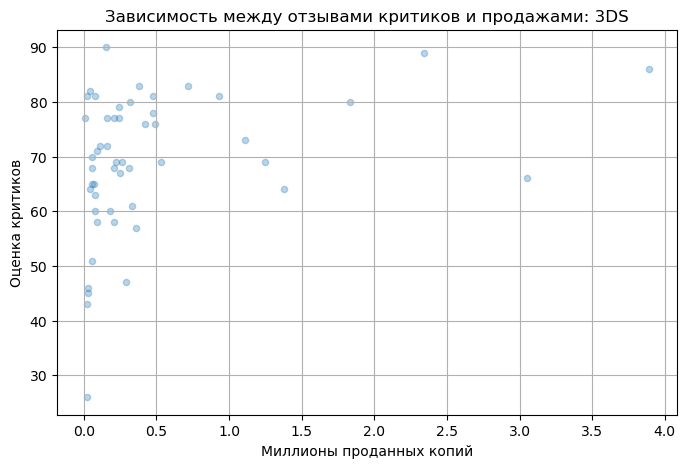

Коэффициент корреляции продаж и отзывов критиков для платформы 3DS
0.31411749286905105


In [33]:
platforms = ['PS4', 'XOne', 'PC', 'WiiU', 'PSV', '3DS']

for platform in platforms:
    relevant_data[relevant_data['platform']==platform].plot(x='total_sales', y='critic_score', kind='scatter',
       alpha=0.3, grid=True, figsize=(8,5))
    plt.title(f'Зависимость между отзывами критиков и продажами: {platform}')
    plt.xlabel('Миллионы проданных копий')
    plt.ylabel('Оценка критиков')
    plt.show()
    print(f'Коэффициент корреляции продаж и отзывов критиков для платформы {platform}')
    print(relevant_data[relevant_data['platform']==platform].total_sales.corr(
    relevant_data[relevant_data['platform']==platform].critic_score))

Судя по графикам, взаимосвязь между продажами игр и оценками критиков слабая. Посчитанные коэффициенты корреляции это подтверждают. В случае с XBox на графике зависимость продаж от отзывов критиков чуть более заметна, однако коэффициент корреляции всё же показывает слабую зависимость.

Посмотрим на взаимосвязь между отзывами пользователей и продажами.

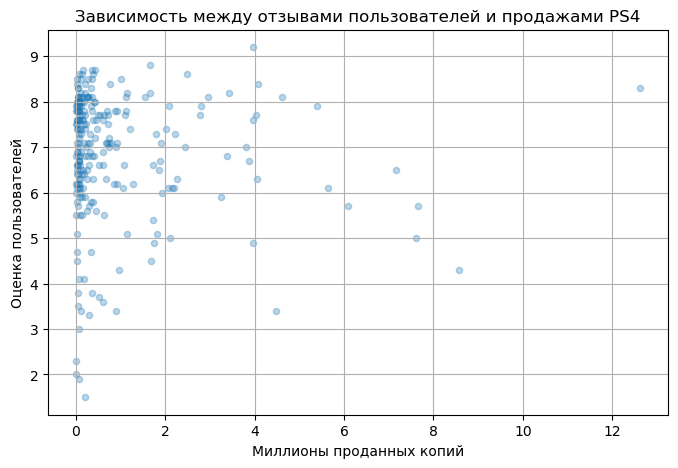

Коэффициент корреляции продаж и отзывов пользователей для платформы PS4
-0.040131589472697356


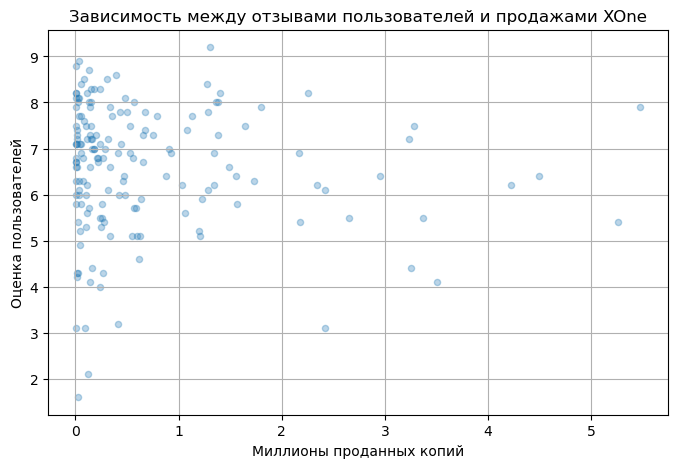

Коэффициент корреляции продаж и отзывов пользователей для платформы XOne
-0.0703839280647581


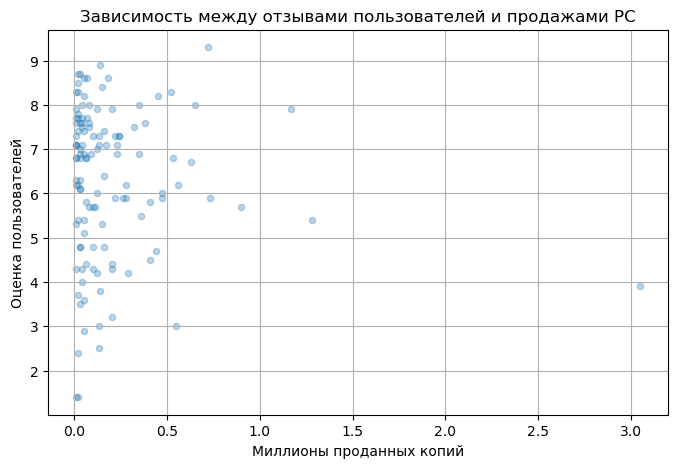

Коэффициент корреляции продаж и отзывов пользователей для платформы PC
-0.07159665703472452


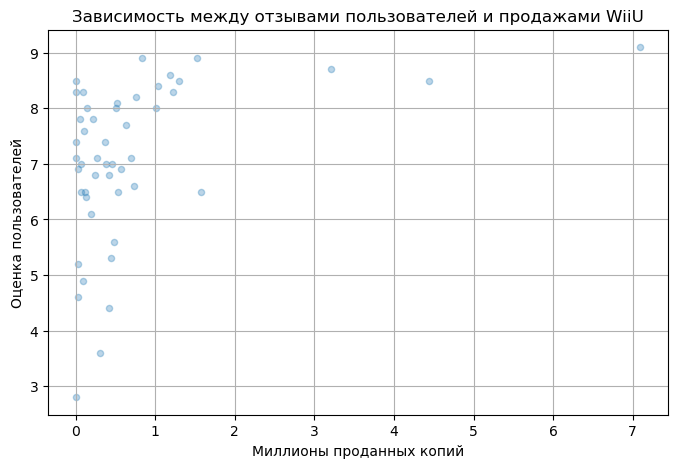

Коэффициент корреляции продаж и отзывов пользователей для платформы WiiU
0.4079264579217078


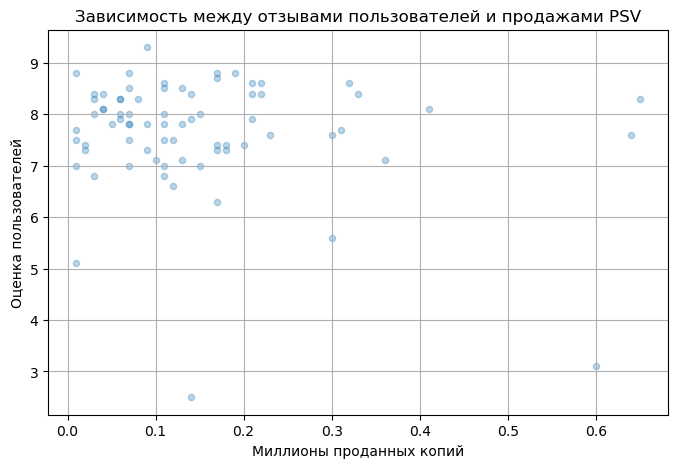

Коэффициент корреляции продаж и отзывов пользователей для платформы PSV
-0.16845504978064446


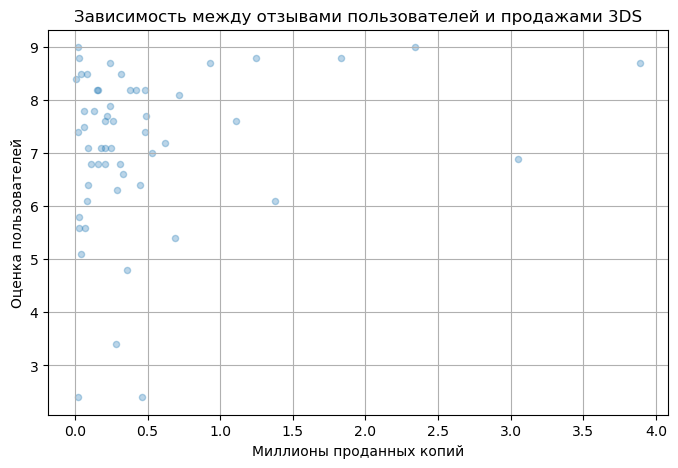

Коэффициент корреляции продаж и отзывов пользователей для платформы 3DS
0.2151932718527028


In [34]:
for platform in platforms:
    relevant_data[relevant_data['platform']==platform].plot(x='total_sales', y='user_score', kind='scatter',
       alpha=0.3, grid=True, figsize=(8,5))
    plt.title(f'Зависимость между отзывами пользователей и продажами {platform}')
    plt.xlabel('Миллионы проданных копий')
    plt.ylabel('Оценка пользователей')
    plt.show()
    print(f'Коэффициент корреляции продаж и отзывов пользователей для платформы {platform}')
    print(relevant_data[relevant_data['platform']==platform].total_sales.corr(
    relevant_data[relevant_data['platform']==platform].user_score))

Графики рассеяния и посчитанные коэффициенты корреляции показывают, что зависимость продаж от отзывов пользователей практически отсутствует. 

### Зависимость продаж игр от жанров

Посмотрим на общее распределение игр по жанрам. 

In [35]:
relevant_data.genre.value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

В целом среди игр преобладает жанр Action. Меньше всего игр в жанре Puzzle. 

Теперь посмотрим, как распределяются жанры игр по продажам.

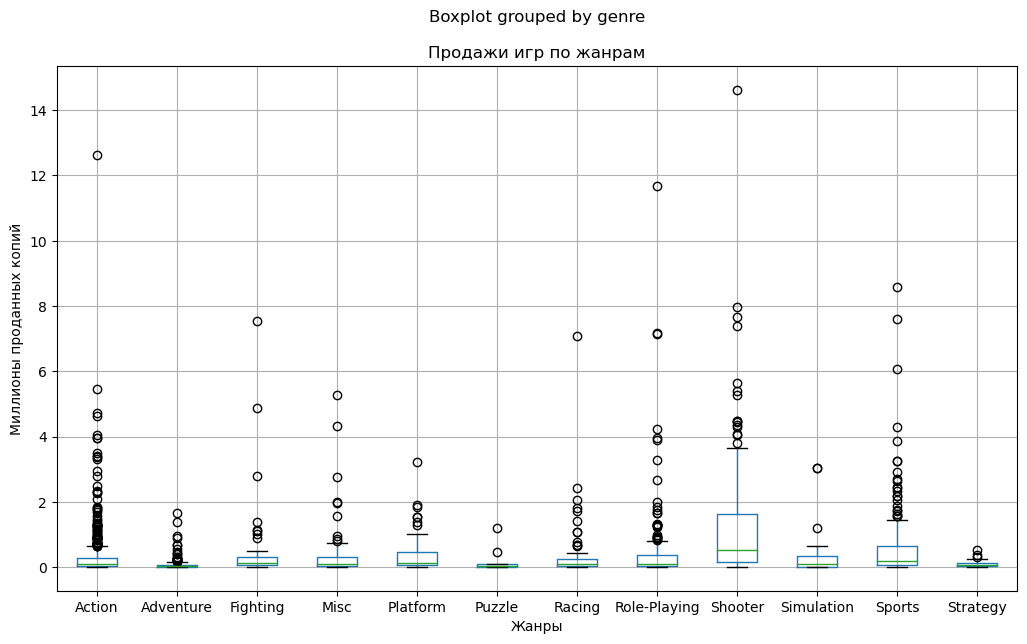

In [36]:
relevant_data.boxplot(column='total_sales', by='genre', figsize=(12,7))
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Миллионы проданных копий')
plt.show()

Самые продаваемые бестселлеры случались в жанрах Shooter, Action и Role-Playing и достигали более 10 млн проданных копий. 

Посмотрим поближе на средние значения.

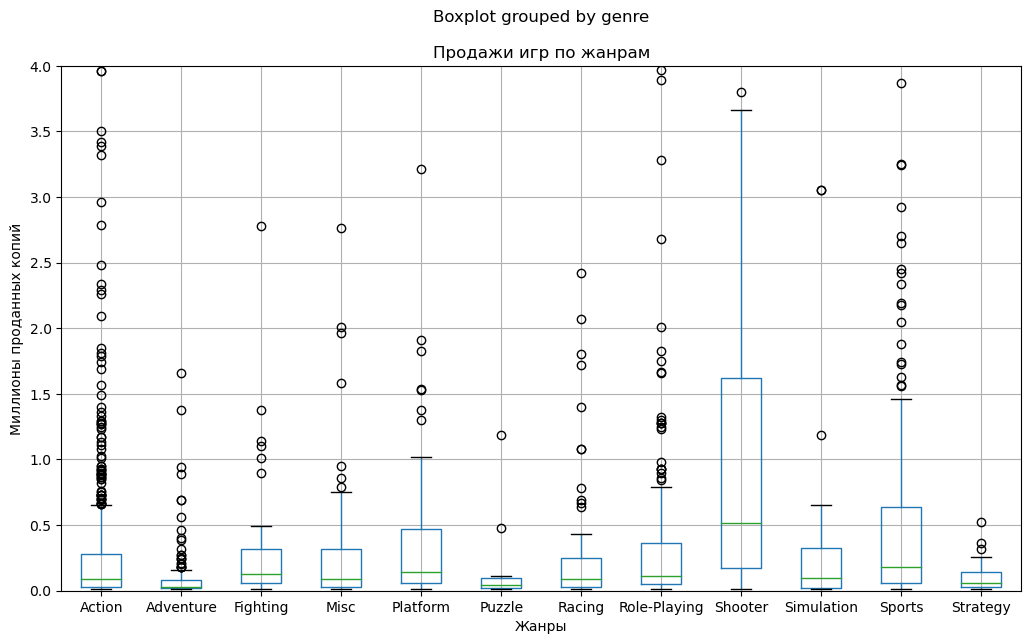

In [37]:
relevant_data.boxplot(column='total_sales', by='genre', figsize=(12,7))
plt.title('Продажи игр по жанрам')
plt.ylim(0,4)
plt.xlabel('Жанры')
plt.ylabel('Миллионы проданных копий')
plt.show()

Самый прибыльный жанр - Shooter, его медианное значение заметно выше всех других жанров.
Аутсайдеры: жанры Adventure и Puzzle, их средние значения по продажам меньше 0,1 млн.

## Портрет пользователя по регионам

Опишем портрет пользователя для каждого региона (NA, EU, JP): топ-5 популярных платформ и топ-5 популярных жанров.

/var/folders/2b/vsb63kjd0611_rygf20zj1780000gn/T/ipykernel_29665/329021338.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_i = data_i.append({'platform': 'Other_platforms',
/var/folders/2b/vsb63kjd0611_rygf20zj1780000gn/T/ipykernel_29665/329021338.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_i = data_i.append({'platform': 'Other_platforms',
/var/folders/2b/vsb63kjd0611_rygf20zj1780000gn/T/ipykernel_29665/329021338.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_i = data_i.append({'platform': 'Other_platforms',


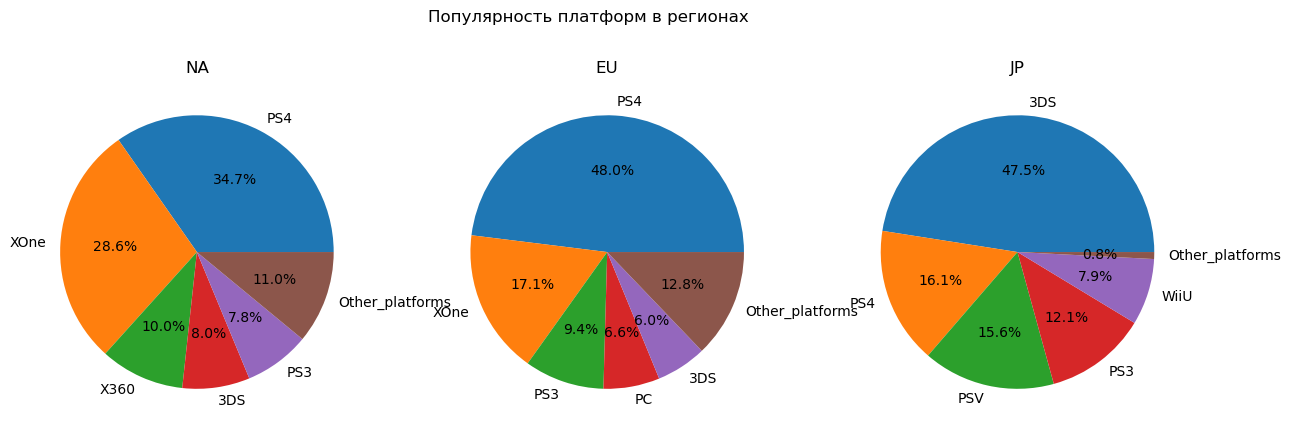

In [38]:
region = relevant_data.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Популярность платформ в регионах')
for i in range(len(region)):
   # выберем 5 самых продающих платформ
   data_i = (relevant_data.groupby('platform')[region[i]].sum().reset_index().
          sort_values(region[i], ascending = False, ignore_index = True)[:5])
   # занесем все остальные продажи в другие жанры
   data_i = data_i.append({'platform': 'Other_platforms', 
                       region[i]: relevant_data[region[i]].sum() - data_i[region[i]].sum()}, ignore_index= True)
   axs[i].pie(data_i[region[i]], labels = data_i['platform'], autopct='%1.1f%%')
   # Зададим название региона
   axs[i].set_title(data_i.columns[1].split('_')[0].upper())
plt.show()

/var/folders/2b/vsb63kjd0611_rygf20zj1780000gn/T/ipykernel_29665/2405824223.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_i = data_i.append({'genre': 'Other_genres',
/var/folders/2b/vsb63kjd0611_rygf20zj1780000gn/T/ipykernel_29665/2405824223.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_i = data_i.append({'genre': 'Other_genres',
/var/folders/2b/vsb63kjd0611_rygf20zj1780000gn/T/ipykernel_29665/2405824223.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_i = data_i.append({'genre': 'Other_genres',


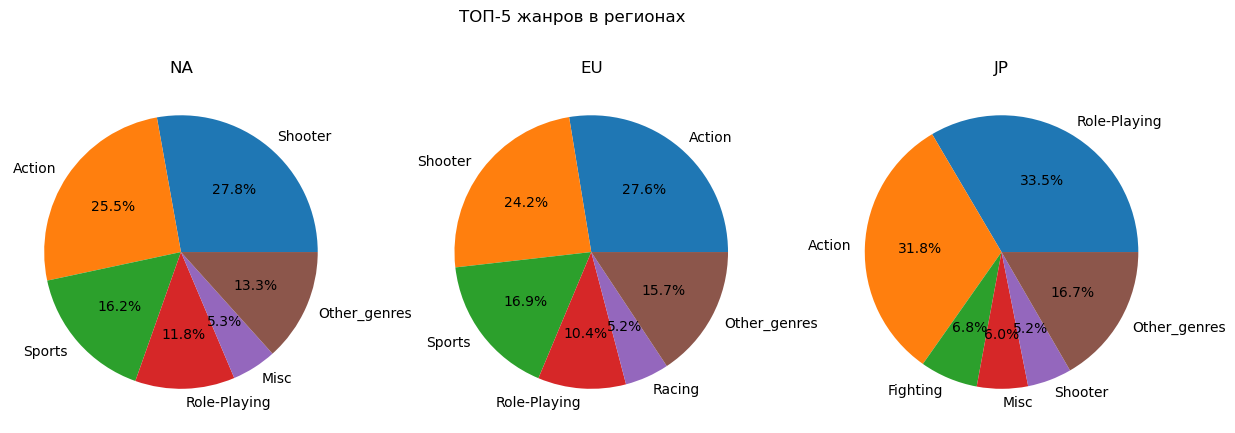

In [39]:
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(len(region)):
   # выберем 5 самых продающих жанров
   data_i = (relevant_data.groupby('genre')[region[i]].sum().reset_index().
          sort_values(region[i], ascending = False, ignore_index = True)[:5])
   # занесем все остальные продажи в другие жанры
   data_i = data_i.append({'genre': 'Other_genres', 
                       region[i]: relevant_data[region[i]].sum() - data_i[region[i]].sum()}, ignore_index= True)
   axs[i].pie(data_i[region[i]], labels = data_i['genre'], autopct='%1.1f%%')
   # Зададим название региона
   axs[i].set_title(data_i.columns[1].split('_')[0].upper())
plt.show()

Посмотрим, влияет ли рейтинг ESRB на продажи в разных регионах.

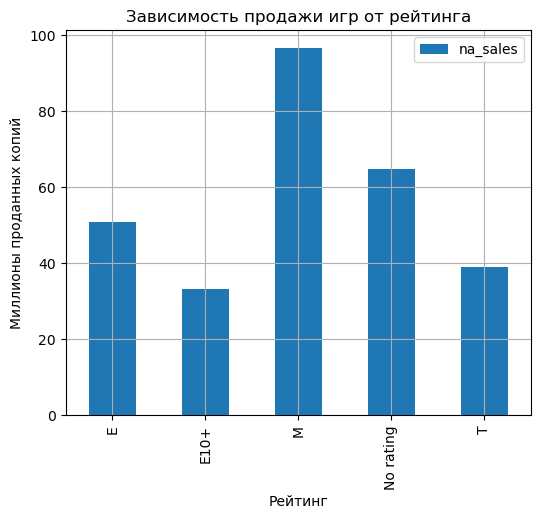

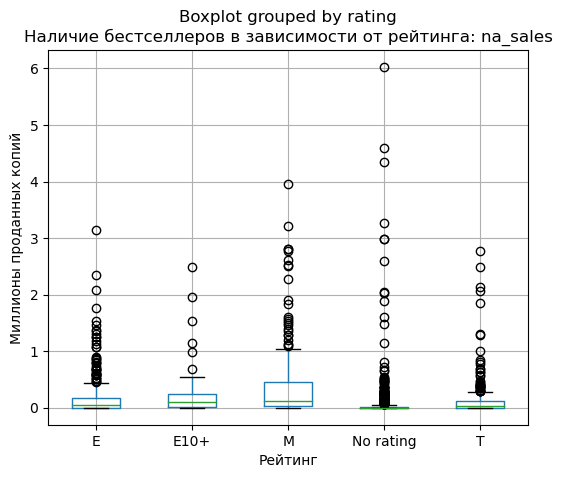

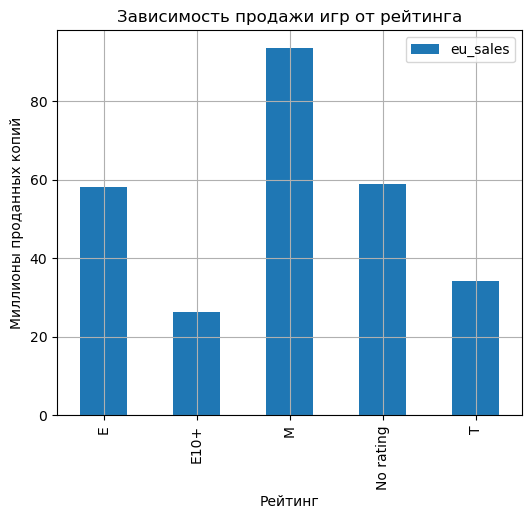

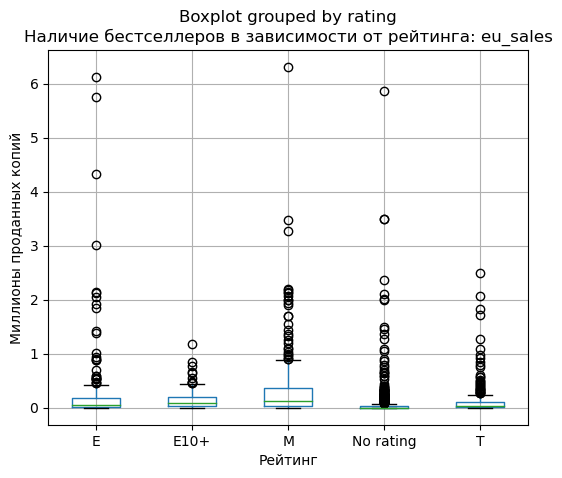

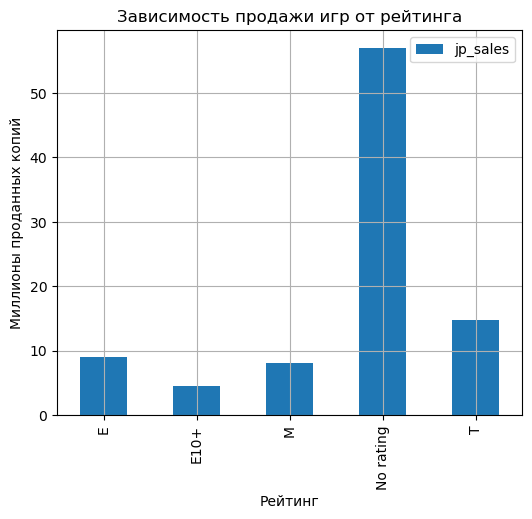

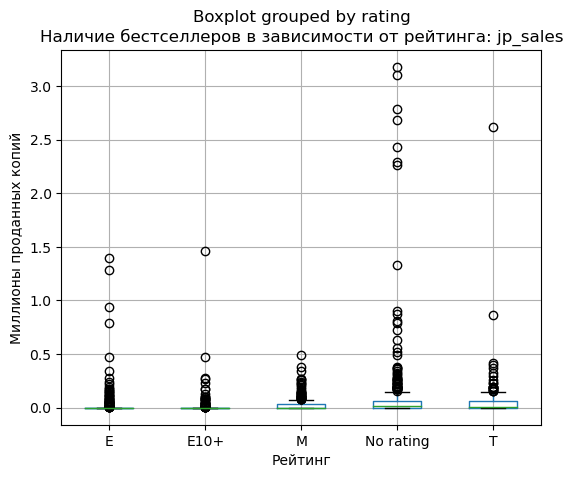

In [40]:
for i in range(len(region)):
    relevant_data.pivot_table(
    index='rating', values=region[i], aggfunc='sum').plot(kind='bar', grid=True, figsize=(6,5))
    plt.title(f'Зависимость продажи игр от рейтинга')
    plt.xlabel('Рейтинг')
    plt.ylabel('Миллионы проданных копий')
    plt.show()
    
    relevant_data.boxplot(column=region[i], by='rating', figsize=(6,5))
    plt.title(f'Наличие бестселлеров в зависимости от рейтинга: {region[i]}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Миллионы проданных копий')
    plt.show()

В Японии рейтинг ESRB практически не играет роли: подавляющее большинство игр пользователи покупают без какой-либо пометки о рейтинге. Вероятно, из-за того, что игры самой популярной платформы в Японии - 3DS - не маркируются рейтингом ESRB.

В Северной Америке и Европе рейтинг ESRB также не играет большой роли: среди игр без рейтинга встречались бестселлеры (более 4 млн проданных копий в NA и более 3 млн - в  EU), а по общему количеству продаж игры без рейтинга на втором месте, средуя за рейтингом М (для 17 и старше).

### Выводы

Опишем каждый из портретов пользователей:

<b>Портрет пользователя из Северной Америки</b>
- Наиболее популярные игровые платформы: PlayStation 4 и XBox One, также в ТОП-5 входят предыдущие поколения этих платформ - PlayStation 3 и XBox 360. Также в топ-5 входит платформа 3DS.
- Пользователи из Северной Америки больше всего любят играть в "стрелялки" (Shooter). На втором месте по популярности - Action, на третьем - Sports.
- Чаще всего пользователи покупают игры рейтинга М (для 17 и старше). На втором месте - игры без какого-либо рейтинга. На третьем - рейтинг Е (для всех).

<b>Портрет пользователя из Европы</b>
- Самая популярная игровая платформа: PlayStation 4, её покупают почти в 3 раза чаще, чем следующую за ней по популярности XBox One. На третьем месте PlayStation 3, а вот на 4-м - игры на компьютере (PC). Замыкает топ-5 платформа 3DS.
- Наибольшей популярностью в Европе пользуется жанр Action. На втором месте Shooter, на третьем - Sports.
- Чаще всего пользователи из Европы покупают игры рейтинга М (для 17 и старше). На втором месте - игры без какого-либо рейтинга, но ненамного реже покупают игры с рейтингом Е (для всех).

<b>Портрет пользователя из Японии</b>
- Самая популярная платформа в Японии: японская Nintendo 3DS, её покупают в 3 раза чаще, чем PlayStation 4 и PSV. На четвертом месте - PlayStation 3, на пятом - WiiU. А вот XBox популярностью не пользуется.
- Пользователи из Японии любят играть в Role-Playing и Action. А вот "шутеры" (Shooter), которые пользуются популярностью в Европе и Северной Америке, в Японии находятся лишь на пятом месте по популярности.
- Рейтинг ESRB для пользователей из Японии не важен, чаще всего они покупают игры без рейтинга.

## Проверка гипотез

<b>Проверим гипотезу:</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC.

Н1: Средний пользовательский рейтинг платформы Xbox One != Средний пользовательский рейтинг платформы PC.

Поскольку нам надо проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым выборкам, воспользуемся методом st.ttest_ind(). Поскольку выборки разного размера (как мы видели выше, пользователей платформы XBox One гораздо больше, чем PC), укажем equal_var=False.

In [41]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    relevant_data.dropna(subset=['user_score']).loc[relevant_data['platform']=='XOne', 'user_score'],
    relevant_data.dropna(subset=['user_score']).loc[relevant_data['platform']=='PC', 'user_score'],
    equal_var=False
)

alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Вывод: исходя из имеющихся данных, на уровне значимости 5% нет оснований отвергнуть гипотезу о том, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

<b>Проверим гипотезу:</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports.

Н1: Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports.

Снова воспользуемся методом st.ttest_ind(). Поскольку выборки, вероятно, разного размера, укажем equal_var=False.

In [42]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    relevant_data.dropna(subset=['user_score']).loc[relevant_data['genre']=='Action', 'user_score'],
    relevant_data.dropna(subset=['user_score']).loc[relevant_data['genre']=='Sports', 'user_score'],
    equal_var=False
)

alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value получилось практически нулевым, т.е. вероятность совпадения среднего рейтинга у жанра Action и жанра Sports крайне мала. 
Вывод: на имеющихся данных, на уровне значимости 5% есть основания отвергнуть гипотезу о том, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC, в пользу альтернативной гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

А у какого жанра средний рейтинг выше?

In [43]:
relevant_data.loc[relevant_data['genre']=='Action', 'user_score'].mean()

6.760606060606061

In [44]:
relevant_data.loc[relevant_data['genre']=='Sports', 'user_score'].mean()

5.225196850393701

Средний рейтинг жанра Action выше, чем у жанра Sports.

## Общие выводы

В рамках исследования мы проанализировали данные по продажам игр до 2016 года включительно.

<b>Выводы о качестве исследуемых данных и рекомендации:</b>

- Датасет довольно высокого качества, собраны все данные по продажам игр в различных регионах мира, есть полная информация по платформам и жанрам игр. На основании такого датасета можно делать анализ.
- Большое количество пропусков в данных с оценками пользователей и критиков - на будущее стоит расширить пул источников, откуда собираются оценки.
- Важно учесть, что за 2016 год собраны неполные данные. Это не позволяет сделать полноценные выводы по 2016 году. Поэтому по возможности стоит дособрать данные за весь 2016 год, чтобы перепроверить результаты исследования.

<b>Выводы о рынке игр (2014-2016 г.):</b>

1. В среднем у консольных игр больше продаж, чем у компьютерных (платформа PC).
2. На всех популярных платформах встречаются бестселлеры, которые собирали продажи от 1 млн проданных копий и более.
3. Средние продажи консольных игр на разных платформах примерно равны и составляют около 0,1 - 0,2 млн проданных копий.
4. Зависимость продаж игр от оценок критиков и пользователей невысока, можно не учитывать этот фактор при выборе игр на продажу.
5. Больше всего выпускают игр в жанре Action. Самые продаваемые бестселлеры случались в жанрах Shooter, Action и Role-Playing и достигали более 10 млн проданных копий. Самый прибыльный жанр - Shooter, его медианное значение продаж заметно выше всех других жанров. Аутсайдеры: жанры Adventure и Puzzle, их средние значения по продажам меньше 0,1 млн.

### Рекомендации по планированию рекламных кампаний

- На глобальном уровне:

1. Игровые платформы, на которых стоит сделать упор в рекламных кампаниях: PlayStation 4 и XBox One.
2. Жанры: Shooter (самый прибыльный жанр) и Action (самый большой ассортимент игр).
3. Зависимость продаж игр от оценок критиков и пользователей слабая, можно не учитывать этот фактор при выборе игр для рекламных кампаний.

- В регионе Северная Америка:
1. Игровые платформы для продвижения: PlayStation 4 и XBox One.
2. Жанры: Shooter (в приоритете) и Action.
3. Рейтинг ESRB: М (17+), Е (для всех) и без рейтинга.

- В регионе Европа:
1. Игровая платформа для продвижения: PlayStation 4.
2. Жанры: Action и Shooter.
3. Рейтинг ESRB: М (17+), Е (для всех) и без рейтинга.

- В регионе Япония:
1. Игровая платформа для продвижения: Nintendo 3DS.
2. Жанры: Role-Playing и Action
3. Рейтинг ESRB: не релевантно.